# Ashwani Kumar

# Prediction using unsupervised ML

## Implementing K-means Clustering to iris dataset

In [2]:
#import required libraries
%matplotlib inline
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [3]:
# import data from source
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


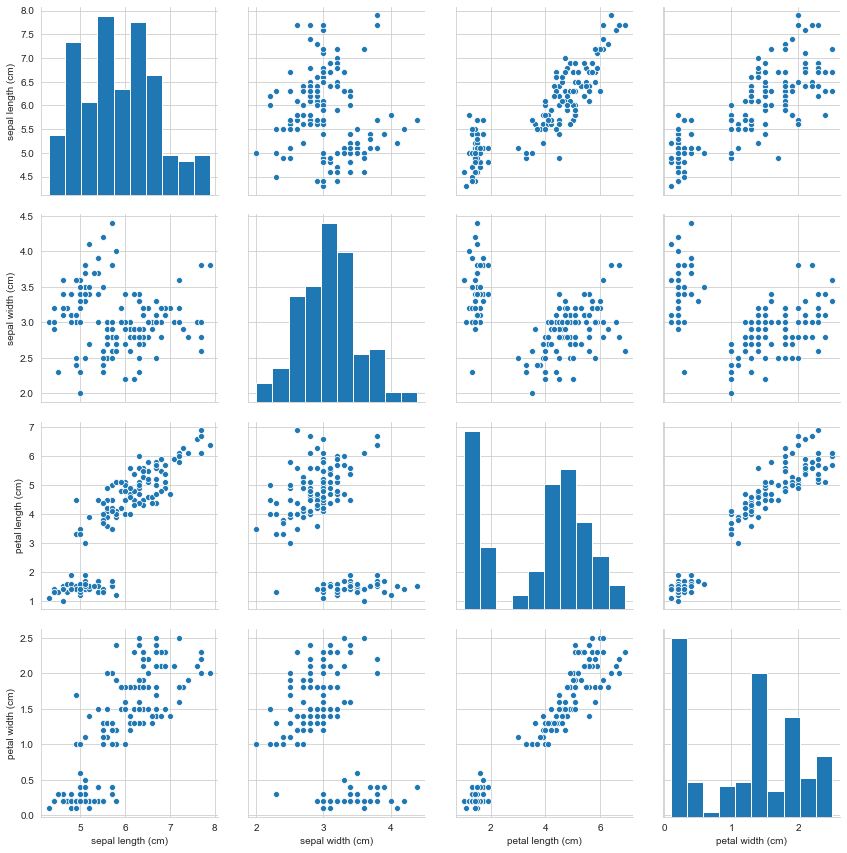

In [6]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(data,size=3);
plt.show()

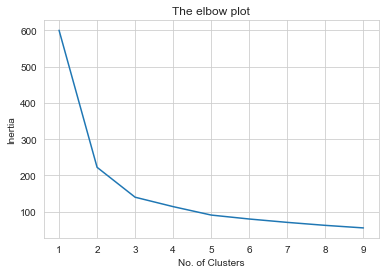

In [7]:
#elbow plot to find optimum no. of clusters

scaler = StandardScaler()# need to scale for kmeans to work properly
X = scaler.fit_transform(data)
n_clusters = range(1,10)
inertia = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#plotting elbow plot
plt.plot(n_clusters, inertia)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title("The elbow plot")
plt.show()

So, let's take number of clusters as '3' (using the elbow plot)

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)

To visualize 2-d plot representation fo the K-means clustering, we will plot the graph between two variables at a time, plotting the cluster center (in red) as well.

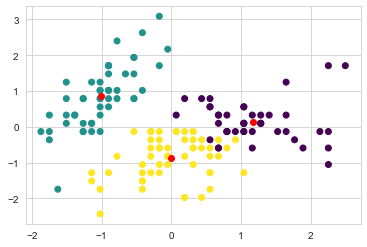

In [9]:
# Visualising K-means (sepal length (cm) Vs. sepal width (cm))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis', )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

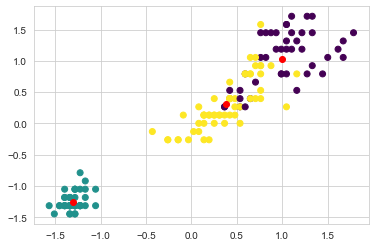

In [11]:
# Visualising K-means (petal length (cm) Vs. petal width (cm))
plt.scatter(X[:,2], X[:,3], c=clusters, cmap='viridis', )
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], c='red')
plt.show()

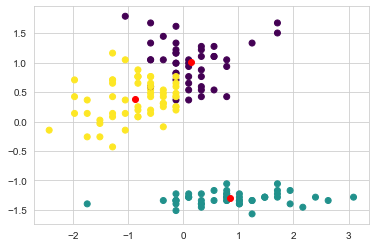

In [12]:
# Visualising K-means (sepal width (cm) Vs. petal length (cm))
plt.scatter(X[:,1], X[:,2], c=clusters, cmap='viridis', )
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red')
plt.show()